# Perceptron Model 

## History

The ultimate goal of AI is to implement machines that possess human intellegence. To embark on this journey, our first step is in understanding how neurons, the building blocks of the brain work. Researchers Warren McCulloch and Walter Pitts took "one small step for man, one giant leap for mankind" by publishing the concept of the MCP neuron. Their research illustrates that dendrites accept input signals that meet in the cell body, and if the input exceeds a certain threshold, the axon fires an output signal to the next neuron. 

Inspired by their research, Frank Rosenblatt proposed a learning algorithm called the perceptron learning rule. The input signal is vector $x=\begin{bmatrix} x_1\\x_2\\\vdots\\x_m\end{bmatrix}$; The net input in the soma is $z=w_1x_1+w_2x_2+\cdots_wmx_m+b$ for weight vector $w=\begin{bmatrix} w_1\\w_2\\\vdots\\w_m\end{bmatrix}$ and bias unit $b=-\theta$ where $\theta$ is a threshold; If the net input is greater than 0, the axon fires, otherwise it does not. 

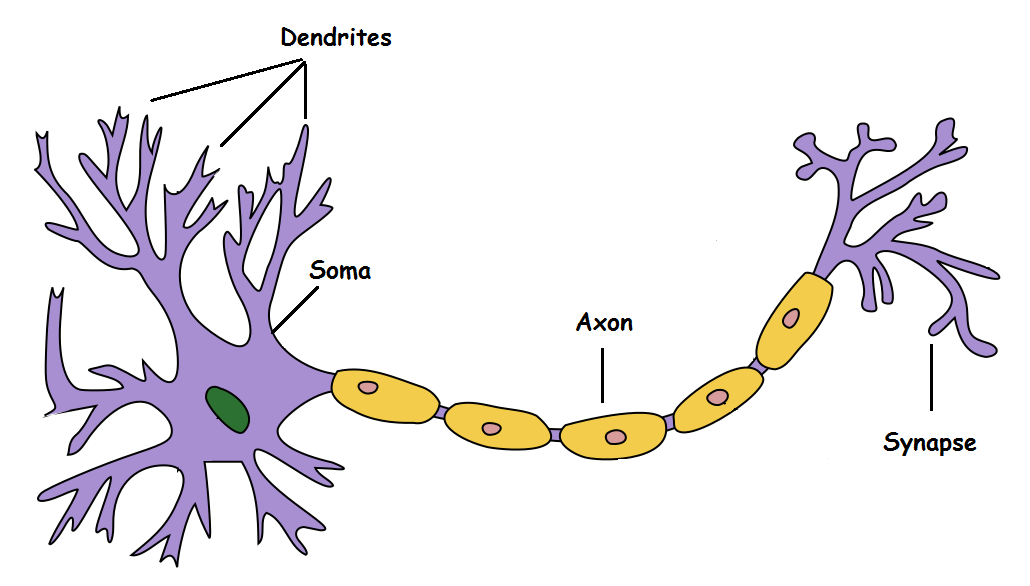

In [502]:
from IPython.display import Image
Image(filename='/Users/rahiqraees/Desktop/fig1.png',width=500) 

## Algorithm

1. Initialize the weights and bias unit to 0 or small random numbers
2. 
* For each training example $x^{(i)}$, compute the output value $\hat{y}^{(i)}$. This is done using our decision function defined as follows: $\sigma(z) = \begin{cases} 1 & z\geq 0 \\0 & \text{otherwise} \\\end{cases}$. Thus, each output value is either assigned to class 1 or class 0.

* update the weights and bias units. More specifically, the update is $\Delta w=\eta(y^{(i)}-\hat{y}^{(i)})x^{(i)}$ and $\Delta b = \eta(y^{(i)}-\hat{y}^{(i)})$. $\eta$ is our learning rate and $0\leq\eta\leq1$.



$\textbf{Why this works:}$\
Suppose the true class label is one and we correctly predict this. Then, $y^{(i)}=1$ and $\hat{y}^{(i)}\implies \Delta w=\eta(1-1)x^{(i)}=0$ and $\Delta b = \eta(1-1)=0$. Thus, the weights and bias unit do not change when we predict correctly. 

Now suppose the true class label is 1 and we incorrectly predict 0. Then, $\Delta w=\eta(1-0)x^{(i)}=\eta x^{(i)}$ and $\Delta b = \eta(1-0)=\eta$. Thus, the weights and bias units are being updated to become more positive in order to move toward the positive target class.

The other two cases are handled similarly.

## Implementation

In [749]:
import numpy as np
import pandas as pd

class Perceptron:
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    Attributes
    -----------
    w : 1d-array
      Weights after fitting.
    b : Scalar
      Bias unit after fitting.
    errors : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        
        self.w = np.random.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b = np.float_(0.)
        self.errors = []
        m = X.shape[0]

        for _ in range(self.n_iter):
            errors = 0
            for i in range(m):
                xi = X[i,:] 
                update = self.eta * (y[i] - self.predict(xi)) 
                self.w += update * xi
                self.b += update
                # amount of misclassifications per epoch
                errors += int(update != 0.0) 
            self.errors.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w) + self.b 

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


## Training

We train our perceptron model using the famous Iris dataset. For more information, visit https://archive.ics.uci.edu/dataset/53/iris.

The dataset consists of three plant species, but the perceptron model is a binary classifier so we filter one out.

In [751]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None) 
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [753]:
# filtering two species
df = df[(df.iloc[:,4]=="Iris-setosa") | (df.iloc[:,4]=="Iris-versicolor")] 
# extract sepal length and petal length so we can visualize the decision boundary
X = df.iloc[:,[0,2]].values
# Creating the two classes
y = np.where(df.iloc[:,4]=="Iris-setosa",0,1)



In [755]:
import matplotlib.pyplot as plt
# dataframe for plotting purposes
df2 = df.iloc[:,[0,2]].assign(y=y)


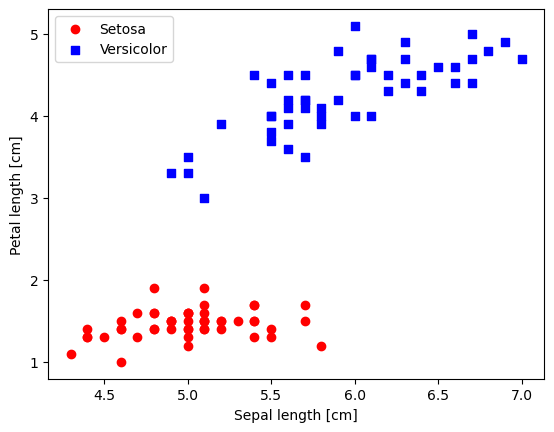

In [757]:
x1, x2, x3, x4 = df2[df2.y==0].iloc[:,0], df2[df2.y==0].iloc[:,1], df2[df2.y==1].iloc[:,0], df2[df2.y==1].iloc[:,1]
temp = 5*ppn.w+ppn.b
plt.scatter(x1,x2,color='red', marker='o', label='Setosa')
plt.scatter(x3,x4,color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()



From the plot we confirm that a linear decision boundary that completely seperates the two classes exists!

In [761]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
ppn.errors

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

We see that our perceptron model converges after the 6th epoch. Hence, we now make perfect decisions.

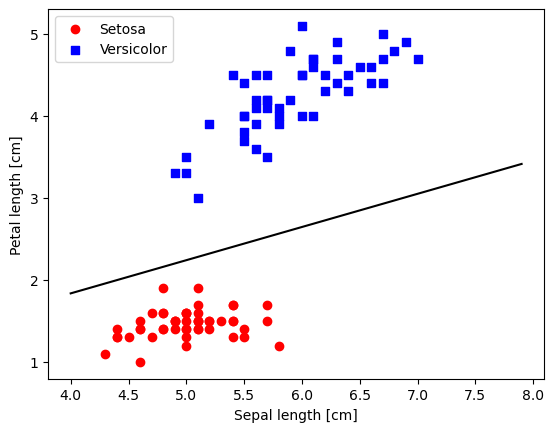

In [763]:
# plotting decision line

input_ = np.arange(4,8,0.1)
slope = - ppn.w[0]/ppn.w[1]
intercept = - ppn.b/ppn.w[1]
output = slope * input + intercept

plt.scatter(x1,x2,color='red', marker='o', label='Setosa')
plt.scatter(x3,x4,color='blue', marker='s', label='Versicolor')
plt.plot(input_,output,color='black')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()
